# Task5A
Set the following parameters: # of epochs = 20; batch size = 8; number
of feature maps at the first convolutional layer = 32 and learning rate = 0.00001
and then run the experiment. What are the value training and validation
accuracies? What can you infer from the learning curves? Is it reasonable to
make a decision based on this set-up of the parameters?

In [3]:
# Data Loader
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize
def gen_labels(im_name, pat1, pat2):

     if pat1 in im_name:
         label = np.array([0])
     elif pat2 in im_name:
         label = np.array([1])
     return label
def get_data(data_path, data_list, img_h, img_w):
    img_labels = []
    
    for item in enumerate(data_list):
         img = imread(os.path.join(data_path, item[1]), as_gray = True) # "as_grey"
         img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
         img_labels.append([np.array(img), gen_labels(item[1], 'Mel', 'Nev')])

         if item[0] % 100 == 0:
             print('Reading: {0}/{1} of train images'.format(item[0], len(data_list)))
    shuffle(img_labels)
    return img_labels

def get_data_arrays(nested_list, img_h, img_w):
     
     img_arrays = np.zeros((len(nested_list), img_h, img_w), dtype = np.float32)
     label_arrays = np.zeros((len(nested_list)), dtype = np.int32)
     for ind in range(len(nested_list)):
         img_arrays[ind] = nested_list[ind][0]
         label_arrays[ind] = nested_list[ind][1]
     img_arrays = np.expand_dims(img_arrays, axis =3)
     return img_arrays, label_arrays

def get_train_test_arrays(train_data_path, test_data_path, train_list,
 test_list, img_h, img_w):

     train_data = get_data(train_data_path, train_list, img_h, img_w)
     test_data = get_data(test_data_path, test_list, img_h, img_w)

     train_img, train_label = get_data_arrays(train_data, img_h, img_w)
     test_img, test_label = get_data_arrays(test_data, img_h, img_w)
     del(train_data)
     del(test_data)
     return train_img, test_img, train_label, test_label

img_w, img_h = 128, 128 # Setting the width and heights of the images.
data_path = '../Data/Lab1/Skin/' # Path to data root with two subdirs.
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')
train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)
x_train, x_test, y_train, y_test = get_train_test_arrays(train_data_path, test_data_path,train_list, test_list, img_h, img_w)

Reading: 0/1000 of train images
Reading: 100/1000 of train images
Reading: 200/1000 of train images
Reading: 300/1000 of train images
Reading: 400/1000 of train images
Reading: 500/1000 of train images
Reading: 600/1000 of train images
Reading: 700/1000 of train images
Reading: 800/1000 of train images
Reading: 900/1000 of train images
Reading: 0/200 of train images
Reading: 100/200 of train images


In [4]:
# LeNet model
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense


def generate_lenet_model(img_ch, img_width, img_height, base):
    inputs_layer = Input(shape=(img_width, img_height, img_ch))
    x = Conv2D(filters=base, kernel_size=(3, 3), activation='relu', strides=1, padding='same')(inputs_layer)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(filters=base*2, kernel_size=(3, 3), activation='relu', strides=1, padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(base*2, activation='relu')(x)
    out = Dense(1, activation='sigmoid')(x)

    clf = tf.keras.Model(inputs=inputs_layer, outputs=out)
    clf.summary()
    return clf


# compile the model with the data

img_width = img_w
img_height = img_h
img_ch = 1
base_dense = 32

leNet_model = generate_lenet_model(img_ch, img_width, img_height, base_dense)

# Compile the model

learning_rate = 0.00001
leNet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['binary_accuracy'])

# Define training parameters
n_epochs = 200
batch_size = 8

# Generate some example data (replace with your actual data)
train_data = x_train
train_labels = y_train
val_data = x_test
val_labels = y_test

# Train the model
clf_hist = leNet_model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=n_epochs, batch_size=batch_size)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 65536)             0     

NotFoundError: Graph execution error:

Detected at node 'model/conv2d/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.8/dist-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelapp.py", line 505, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.8/dist-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 685, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 738, in _run_callback
      ret = callback()
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 825, in inner
      self.ctx_run(self.run)
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 786, in run
      yielded = self.gen.send(value)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 540, in execute_request
      self.do_execute(
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py", line 294, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2880, in run_cell
      result = self._run_cell(
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2935, in _run_cell
      return runner(coro)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3134, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3337, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3397, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-4-42c4272643d5>", line 46, in <cell line: 46>
      clf_hist = leNet_model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=n_epochs, batch_size=batch_size)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py", line 458, in call
      return self._run_internal_graph(
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/layers/convolutional/base_conv.py", line 250, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "/usr/local/lib/python3.8/dist-packages/keras/layers/convolutional/base_conv.py", line 225, in convolution_op
      return tf.nn.convolution(
Node: 'model/conv2d/Conv2D'
No algorithm worked!  Error messages:
  Profiling failure on CUDNN engine 1#TC: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in tensorflow/stream_executor/cuda/cuda_dnn.cc(4023): 'cudnnConvolutionForward( cudnn.handle(), alpha, input_nd_.handle(), input_data.opaque(), filter_.handle(), filter_data.opaque(), conv_.handle(), ToConvForwardAlgo(algo), scratch_memory.opaque(), scratch_memory.size(), beta, output_nd_.handle(), output_data.opaque())'
  Profiling failure on CUDNN engine 1: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in tensorflow/stream_executor/cuda/cuda_dnn.cc(4023): 'cudnnConvolutionForward( cudnn.handle(), alpha, input_nd_.handle(), input_data.opaque(), filter_.handle(), filter_data.opaque(), conv_.handle(), ToConvForwardAlgo(algo), scratch_memory.opaque(), scratch_memory.size(), beta, output_nd_.handle(), output_data.opaque())'
  Profiling failure on CUDNN engine 0#TC: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in tensorflow/stream_executor/cuda/cuda_dnn.cc(4023): 'cudnnConvolutionForward( cudnn.handle(), alpha, input_nd_.handle(), input_data.opaque(), filter_.handle(), filter_data.opaque(), conv_.handle(), ToConvForwardAlgo(algo), scratch_memory.opaque(), scratch_memory.size(), beta, output_nd_.handle(), output_data.opaque())'
  Profiling failure on CUDNN engine 0: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in tensorflow/stream_executor/cuda/cuda_dnn.cc(4023): 'cudnnConvolutionForward( cudnn.handle(), alpha, input_nd_.handle(), input_data.opaque(), filter_.handle(), filter_data.opaque(), conv_.handle(), ToConvForwardAlgo(algo), scratch_memory.opaque(), scratch_memory.size(), beta, output_nd_.handle(), output_data.opaque())'
  Profiling failure on CUDNN engine 2#TC: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in tensorflow/stream_executor/cuda/cuda_dnn.cc(4023): 'cudnnConvolutionForward( cudnn.handle(), alpha, input_nd_.handle(), input_data.opaque(), filter_.handle(), filter_data.opaque(), conv_.handle(), ToConvForwardAlgo(algo), scratch_memory.opaque(), scratch_memory.size(), beta, output_nd_.handle(), output_data.opaque())'
  Profiling failure on CUDNN engine 2: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in tensorflow/stream_executor/cuda/cuda_dnn.cc(4023): 'cudnnConvolutionForward( cudnn.handle(), alpha, input_nd_.handle(), input_data.opaque(), filter_.handle(), filter_data.opaque(), conv_.handle(), ToConvForwardAlgo(algo), scratch_memory.opaque(), scratch_memory.size(), beta, output_nd_.handle(), output_data.opaque())'
  Profiling failure on CUDNN engine 4#TC: UNKNOWN: CUDNN_STATUS_INTERNAL_ERROR
in tensorflow/stream_executor/cuda/cuda_dnn.cc(4023): 'cudnnConvolutionForward( cudnn.handle(), alpha, input_nd_.handle(), input_data.opaque(), filter_.handle(), filter_data.opaque(), conv_.handle(), ToConvForwardAlgo(algo), scratch_memory.opaque(), scratch_memory.size(), beta, output_nd_.handle(), output_data.opaque())'
  Profiling failure on CUDNN engine 4: UNKNOWN: CUDNN_STATUS_INTERNAL_ERROR
in tensorflow/stream_executor/cuda/cuda_dnn.cc(4023): 'cudnnConvolutionForward( cudnn.handle(), alpha, input_nd_.handle(), input_data.opaque(), filter_.handle(), filter_data.opaque(), conv_.handle(), ToConvForwardAlgo(algo), scratch_memory.opaque(), scratch_memory.size(), beta, output_nd_.handle(), output_data.opaque())'
  Profiling failure on CUDNN engine 6#TC: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in tensorflow/stream_executor/cuda/cuda_dnn.cc(4023): 'cudnnConvolutionForward( cudnn.handle(), alpha, input_nd_.handle(), input_data.opaque(), filter_.handle(), filter_data.opaque(), conv_.handle(), ToConvForwardAlgo(algo), scratch_memory.opaque(), scratch_memory.size(), beta, output_nd_.handle(), output_data.opaque())'
  Profiling failure on CUDNN engine 6: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in tensorflow/stream_executor/cuda/cuda_dnn.cc(4023): 'cudnnConvolutionForward( cudnn.handle(), alpha, input_nd_.handle(), input_data.opaque(), filter_.handle(), filter_data.opaque(), conv_.handle(), ToConvForwardAlgo(algo), scratch_memory.opaque(), scratch_memory.size(), beta, output_nd_.handle(), output_data.opaque())'
  Profiling failure on CUDNN engine 5#TC: UNKNOWN: CUDNN_STATUS_INTERNAL_ERROR
in tensorflow/stream_executor/cuda/cuda_dnn.cc(4023): 'cudnnConvolutionForward( cudnn.handle(), alpha, input_nd_.handle(), input_data.opaque(), filter_.handle(), filter_data.opaque(), conv_.handle(), ToConvForwardAlgo(algo), scratch_memory.opaque(), scratch_memory.size(), beta, output_nd_.handle(), output_data.opaque())'
  Profiling failure on CUDNN engine 5: UNKNOWN: CUDNN_STATUS_INTERNAL_ERROR
in tensorflow/stream_executor/cuda/cuda_dnn.cc(4023): 'cudnnConvolutionForward( cudnn.handle(), alpha, input_nd_.handle(), input_data.opaque(), filter_.handle(), filter_data.opaque(), conv_.handle(), ToConvForwardAlgo(algo), scratch_memory.opaque(), scratch_memory.size(), beta, output_nd_.handle(), output_data.opaque())'
  Profiling failure on CUDNN engine 7#TC: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in tensorflow/stream_executor/cuda/cuda_dnn.cc(4023): 'cudnnConvolutionForward( cudnn.handle(), alpha, input_nd_.handle(), input_data.opaque(), filter_.handle(), filter_data.opaque(), conv_.handle(), ToConvForwardAlgo(algo), scratch_memory.opaque(), scratch_memory.size(), beta, output_nd_.handle(), output_data.opaque())'
  Profiling failure on CUDNN engine 7: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in tensorflow/stream_executor/cuda/cuda_dnn.cc(4023): 'cudnnConvolutionForward( cudnn.handle(), alpha, input_nd_.handle(), input_data.opaque(), filter_.handle(), filter_data.opaque(), conv_.handle(), ToConvForwardAlgo(algo), scratch_memory.opaque(), scratch_memory.size(), beta, output_nd_.handle(), output_data.opaque())'
	 [[{{node model/conv2d/Conv2D}}]] [Op:__inference_train_function_824]

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="training loss")
plt.plot(clf_hist.history["val_loss"], label="validation loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
        np.min(clf_hist.history["val_loss"]),
        marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();



plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["binary_accuracy"], label="training accuracy")
plt.plot(clf_hist.history["val_binary_accuracy"], label="validation accuracy")
plt.plot( np.argmax(clf_hist.history["val_binary_accuracy"]),
        np.max(clf_hist.history["val_binary_accuracy"]),
        marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Binary accuracy Value")
plt.legend();

# Task 6

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation

def generate_alexnet_model(img_ch, img_width, img_height, n_base,drop,d_rate):
    
    inputs_layer = Input(shape=(img_width, img_height, img_ch))
    x = Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch), kernel_size=(3, 3), strides=(1, 1), padding='same',activation='relu')(inputs_layer)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(filters=n_base * 2, kernel_size=(3, 3), strides=(1, 1), padding='same',activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(filters=n_base * 4, kernel_size=(3, 3), strides=(1, 1), padding='same',activation='relu')(x)
    x = Conv2D(filters=n_base * 4, kernel_size=(3, 3), strides=(1, 1), padding='same',activation='relu')(x)
    x = Conv2D(filters=n_base * 2, kernel_size=(3, 3), strides=(1, 1), padding='same',activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128,activation='relu')(x)
    if drop:
        x = Dropout(rate=d_rate)(x)
    x = Dense(64, activation='relu')(x)
    if drop:
        x = Dropout(rate=d_rate)(x)
    out = Dense(1,activation='sigmoid')(x)
    
    clf = tf.keras.Model(inputs=inputs_layer, outputs=out)
    clf.summary()
    return clf

# compile the model with the data

img_width = img_w
img_height = img_h
img_ch = 1
base_dense = 8
drop=False
d_rate=0.4

alexNet = generate_alexnet_model(img_ch, img_width, img_height, base_dense,drop,d_rate)

learning_rate_al = 1e-5 
# Adjust the learning rate as needed
alexNet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate_al), loss='binary_crossentropy', metrics=['accuracy'])

# Replace these with your actual training and testing data
train_data_al = x_train
train_labels_al = y_train
val_data_al = x_test
val_labels_al = y_test

batch_size_al = 8  # Adjust the batch size as needed
n_epochs_al = 100  # Adjust the number of epochs as needed

alexnet_hist = alexNet.fit(train_data_al, train_labels_al, validation_data=(val_data_al, val_labels_al), epochs=n_epochs_al, batch_size=batch_size_al)




NameError: name 'img_w' is not defined

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(alexnet_hist.history["loss"], label="training loss")
plt.plot(alexnet_hist.history["val_loss"], label="validation loss")
plt.plot( np.argmin(alexnet_hist.history["val_loss"]),
        np.min(alexnet_hist.history["val_loss"]),
        marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();



plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(alexnet_hist.history["accuracy"], label="training accuracy")
plt.plot(alexnet_hist.history["val_accuracy"], label="validation accuracy")
plt.plot( np.argmax(alexnet_hist.history["val_accuracy"]),
        np.max(alexnet_hist.history["val_accuracy"]),
        marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Binary accuracy Value")
plt.legend();

# Task 6B Drop-out layer 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout


# compile the model with the data

img_width = img_w
img_height = img_h
img_ch = 1
base_dense = 8
drop=True
d_rate=0.4

alexNet = generate_alexnet_model(img_ch, img_width, img_height, base_dense,drop,d_rate)

learning_rate_al = 0.0001 
# Adjust the learning rate as needed
alexNet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate_al), loss='binary_crossentropy', metrics=['accuracy'])

# Replace these with your actual training and testing data
train_data_al = x_train
train_labels_al = y_train
val_data_al = x_test
val_labels_al = y_test

batch_size_al = 8  # Adjust the batch size as needed
n_epochs_al = 150  # Adjust the number of epochs as needed

alexnet_hist_dr = alexNet.fit(train_data_al, train_labels_al, validation_data=(val_data_al, val_labels_al), epochs=n_epochs_al, batch_size=batch_size_al)




In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(alexnet_hist_dr.history["loss"], label="training loss")
plt.plot(alexnet_hist_dr.history["val_loss"], label="validation loss")
plt.plot( np.argmin(alexnet_hist_dr.history["val_loss"]),
        np.min(alexnet_hist_dr.history["val_loss"]),
        marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();



plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(alexnet_hist_dr.history["accuracy"], label="training accuracy")
plt.plot(alexnet_hist_dr.history["val_accuracy"], label="validation accuracy")
plt.plot( np.argmax(alexnet_hist_dr.history["val_accuracy"]),
        np.max(alexnet_hist_dr.history["val_accuracy"]),
        marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Binary accuracy Value")
plt.legend();

# Task 6E

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation

def generate_alexnet_model(img_ch, img_width, img_height, n_base):
    
    inputs_layer = Input(shape=(img_width, img_height, img_ch))
    x = Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch), kernel_size=(3, 3), strides=(1, 1), padding='same',activation='relu')(inputs_layer)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(filters=n_base * 2, kernel_size=(3, 3), strides=(1, 1), padding='same',activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(filters=n_base * 4, kernel_size=(3, 3), strides=(1, 1), padding='same',activation='relu')(x)
    x = Conv2D(filters=n_base * 4, kernel_size=(3, 3), strides=(1, 1), padding='same',activation='relu')(x)
    x = Conv2D(filters=n_base * 2, kernel_size=(3, 3), strides=(1, 1), padding='same',activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128,activation='relu')(x)
    x = Dense(64,activation='relu')(x)
    out = Dense(1,activation='sigmoid')(x)
    
    clf = tf.keras.Model(inputs=inputs_layer, outputs=out)
    clf.summary()
    return clf

# compile the model with the data

img_width = img_w
img_height = img_h
img_ch = 1
base_dense = 8

alexNet = generate_alexnet_model(img_ch, img_width, img_height, base_dense)

learning_rate_al = 1e-5 
# Adjust the learning rate as needed
alexNet.compile(optimizer=tf.keras.optimizers.SGD(learning_rate_al), loss='binary_crossentropy', metrics=['accuracy'])

# Replace these with your actual training and testing data
train_data_al = x_train
train_labels_al = y_train
val_data_al = x_test
val_labels_al = y_test

batch_size_al = 8  # Adjust the batch size as needed
n_epochs_al = 100  # Adjust the number of epochs as needed

alexnet_hist = alexNet.fit(train_data_al, train_labels_al, validation_data=(val_data_al, val_labels_al), epochs=n_epochs_al, batch_size=batch_size_al)



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(alexnet_hist.history["loss"], label="training loss")
plt.plot(alexnet_hist.history["val_loss"], label="validation loss")
plt.plot( np.argmin(alexnet_hist.history["val_loss"]),
        np.min(alexnet_hist.history["val_loss"]),
        marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();



plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(alexnet_hist.history["accuracy"], label="training accuracy")
plt.plot(alexnet_hist.history["val_accuracy"], label="validation accuracy")
plt.plot( np.argmax(alexnet_hist.history["val_accuracy"]),
        np.max(alexnet_hist.history["val_accuracy"]),
        marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Binary accuracy Value")
plt.legend();

# Task 6F

In [1]:
# Data Loader
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize
def gen_labels(im_name, pat1, pat2):

     if pat1 in im_name:
         label = np.array([0])
     elif pat2 in im_name:
         label = np.array([1])
     return label
def get_data(data_path, data_list, img_h, img_w):
    img_labels = []
    
    for item in enumerate(data_list):
         img = imread(os.path.join(data_path, item[1]), as_gray = True) # "as_grey"
         img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
         img_labels.append([np.array(img), gen_labels(item[1], 'Mel', 'Nev')])

         if item[0] % 100 == 0:
             print('Reading: {0}/{1} of train images'.format(item[0], len(data_list)))
    shuffle(img_labels)
    return img_labels

def get_data_arrays(nested_list, img_h, img_w):
     
     img_arrays = np.zeros((len(nested_list), img_h, img_w), dtype = np.float32)
     label_arrays = np.zeros((len(nested_list)), dtype = np.int32)
     for ind in range(len(nested_list)):
         img_arrays[ind] = nested_list[ind][0]
         label_arrays[ind] = nested_list[ind][1]
     img_arrays = np.expand_dims(img_arrays, axis =3)
     return img_arrays, label_arrays

def get_train_test_arrays(train_data_path, test_data_path, train_list,
 test_list, img_h, img_w):

     train_data = get_data(train_data_path, train_list, img_h, img_w)
     test_data = get_data(test_data_path, test_list, img_h, img_w)

     train_img, train_label = get_data_arrays(train_data, img_h, img_w)
     test_img, test_label = get_data_arrays(test_data, img_h, img_w)
     del(train_data)
     del(test_data)
     return train_img, test_img, train_label, test_label

img_w, img_h = 128, 128 # Setting the width and heights of the images.
data_path = '../Data/Lab1/Skin/' # Path to data root with two subdirs.
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')
train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)
x_train, x_test, y_train, y_test = get_train_test_arrays(train_data_path, test_data_path,train_list, test_list, img_h, img_w)

Reading: 0/1000 of train images
Reading: 100/1000 of train images
Reading: 200/1000 of train images
Reading: 300/1000 of train images
Reading: 400/1000 of train images
Reading: 500/1000 of train images
Reading: 600/1000 of train images
Reading: 700/1000 of train images
Reading: 800/1000 of train images
Reading: 900/1000 of train images
Reading: 0/200 of train images
Reading: 100/200 of train images


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout,Input

def generate_alexnet_model(img_ch, img_width, img_height, n_base):
    
    inputs_layer = Input(shape=(img_width, img_height, img_ch))
    x = Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch), kernel_size=(3, 3), strides=(1, 1), padding='same',activation='relu')(inputs_layer)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(filters=n_base * 2, kernel_size=(3, 3), strides=(1, 1), padding='same',activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(filters=n_base * 4, kernel_size=(3, 3), strides=(1, 1), padding='same',activation='relu')(x)
    x = Conv2D(filters=n_base * 4, kernel_size=(3, 3), strides=(1, 1), padding='same',activation='relu')(x)
    x = Conv2D(filters=n_base * 2, kernel_size=(3, 3), strides=(1, 1), padding='same',activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128,activation='relu')(x)
    x = Dense(64,activation='relu')(x)
    out = Dense(1,activation='sigmoid')(x)
    
    clf = tf.keras.Model(inputs=inputs_layer, outputs=out)
    clf.summary()
    return clf

# compile the model with the data

img_width = img_w
img_height = img_h
img_ch = 1
base_dense = 8

alexNet = generate_alexnet_model(img_ch, img_width, img_height, base_dense)

learning_rate_al = 1e-5 
# Adjust the learning rate as needed
alexNet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate_al), loss='hinge', metrics=['accuracy'])

# Replace these with your actual training and testing data
train_data_al = x_train
train_labels_al = y_train
val_data_al = x_test
val_labels_al = y_test

y_test[y_test == 0] = -1 
y_train[y_train == 0] = -1

batch_size_al = 8  # Adjust the batch size as needed
n_epochs_al = 100  # Adjust the number of epochs as needed

alexnet_hist = alexNet.fit(train_data_al, train_labels_al, validation_data=(val_data_al, val_labels_al), epochs=n_epochs_al, batch_size=batch_size_al)



Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_15 (Conv2D)          (None, 128, 128, 8)       80        
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 16)        1168      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        4640

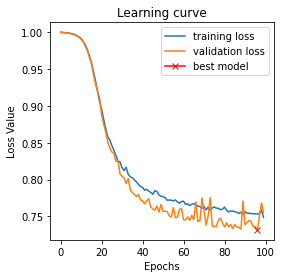

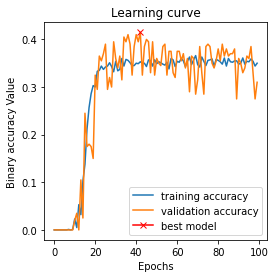

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(alexnet_hist.history["loss"], label="training loss")
plt.plot(alexnet_hist.history["val_loss"], label="validation loss")
plt.plot( np.argmin(alexnet_hist.history["val_loss"]),
        np.min(alexnet_hist.history["val_loss"]),
        marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();



plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(alexnet_hist.history["accuracy"], label="training accuracy")
plt.plot(alexnet_hist.history["val_accuracy"], label="validation accuracy")
plt.plot( np.argmax(alexnet_hist.history["val_accuracy"]),
        np.max(alexnet_hist.history["val_accuracy"]),
        marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Binary accuracy Value")
plt.legend();